# Assignment 6.2: Preparing Data for Final Team Project

Instructions:
1. Set up a GitHub repository for your final project. Make it public, or add your instructor as a collaborator. Include in this repository the code to assemble your final project data set. The best practice is to place this data creation code in its own notebook.
2. In a separate notebook, calculate descriptive statistics on your final-project data. You are welcome to reuse code from earlier modules.

Deliverable:
* When you have completed this notebook, run all cells, print the notebook as a PDF, and submit the PDF in Blackboard.
* Commit and push your code, so your repo is up to date.
* Enter your GitHub link as “online text” in the Blackboard assignment. 

In [3]:
# Import Libraries
import pandas as pd 
from matplotlib import pyplot as plt

# import os
# import re
# import emoji
import pandas as pd

from collections import Counter #, defaultdict
from nltk.corpus import stopwords
from string import punctuation
from wordcloud import WordCloud 
import textacy.preprocessing as tprep
from lexical_diversity import lex_div as ld

# from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

# Some punctuation variations
punctuation = set(punctuation) # speeds up comparison

# Stopwords
sw = stopwords.words("english")


In [4]:
# Get Imported Data
raw_data = pd.read_pickle('G:\\My Drive\\ADS-509_Final_Team_Project\\arxiv_data_2023_02_13.pkl')
raw_data

,titles,abstracts,terms
0,Reinforcement Learning from Multiple Sensors v...,"In many scenarios, observations from more than...",[cs.LG]
1,Interventional Causal Representation Learning,Causal representation learning seeks to extrac...,"[stat.ML, cs.LG]"
2,Self-Supervised Node Representation Learning v...,Self-supervised node representation learning a...,[cs.LG]
3,Out-of-Distribution Representation Learning fo...,Time series classification is an important pro...,"[cs.LG, cs.AI]"
4,Trading Information between Latents in Hierarc...,Variational Autoencoders (VAEs) were originall...,"[stat.ML, cs.CV, cs.IT, cs.LG, math.IT]"
...,...,...,...
64568,Plot 94 in ambiance X-Window,<PLOT > is a collection of routines to draw su...,"[cs.CV, cs.GR]"
64569,Automatic Face Recognition System Based on Loc...,We present an automatic face verification syst...,[cs.CV]
64570,Convexity Analysis of Snake Models Based on Ha...,This paper presents a convexity analysis for t...,"[cs.CV, cs.GR, I.4; I.4.6;I.4.8]"
64571,Semi-automatic vectorization of linear network...,A system for semi-automatic vectorization of l...,"[cs.CV, cs.MM, I.4.6]"


In [5]:
# Helper Function - Descriptive Statistics
def descriptive_stats(tokens, top_n_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """
    # Fill in the correct values here. 
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = ld.ttr(tokens) # Simple TTR = len(Counter(text))/len(text)
    num_characters = sum([len(i) for i in tokens])
    
    if verbose:        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        print(f"The top {top_n_tokens} most common tokens")
        print(Counter(tokens).most_common(top_n_tokens))
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])

In [6]:
# Helper Functions - Cleaning data

def normalize(text):
    text = tprep.normalize.hyphenated_words(text)
    text = tprep.normalize.quotation_marks(text)
    text = tprep.normalize.unicode(text)
    text = tprep.remove.accents(text)
    return text

def remove_punctuation(text, punct_set=punctuation) : 
    """This function removes punctuation from a string."""
    return("".join([ch for ch in text if ch not in punct_set]))

def tokenize(text) : 
    """ Splitting on whitespace rather than the book's tokenize function. That 
        function will drop tokens like '#hashtag' or '2A', which we need for Twitter. """
    
    # modify this function to return tokens
    return text.lower().strip().split() 

def remove_stop(tokens) :
    """This function removes stopwords from a list of tokens."""
    return([t for t in tokens if t.lower() not in sw])
    
def prepare(text, pipeline) : 
    """ This fuction manages and executes other functions like a pipline. """
    tokens = str(text)
    
    for transform in pipeline : 
        tokens = transform(tokens)
        
    return(tokens)

In [10]:
# Helper Function - Flatten a List of Lists
def flatten_lists(list_of_lists):
    """This function flattens a list of lists into a single list."""
    return [i for s in list_of_lists for i in s]

In [8]:
# Clean and Tokenize Data
df = raw_data.copy()
my_pipeline = [normalize, remove_punctuation, tokenize, remove_stop]
df["tokens"] = df["abstracts"].apply(prepare, pipeline=my_pipeline)
df

# filter on Term
# mask = df.terms.apply(lambda x: 'stat.ML' in x)
# df1 = df[mask]
# df1

,titles,abstracts,terms,tokens
0,Reinforcement Learning from Multiple Sensors v...,"In many scenarios, observations from more than...",[cs.LG],"[many, scenarios, observations, one, sensor, m..."
1,Interventional Causal Representation Learning,Causal representation learning seeks to extrac...,"[stat.ML, cs.LG]","[causal, representation, learning, seeks, extr..."
2,Self-Supervised Node Representation Learning v...,Self-supervised node representation learning a...,[cs.LG],"[selfsupervised, node, representation, learnin..."
3,Out-of-Distribution Representation Learning fo...,Time series classification is an important pro...,"[cs.LG, cs.AI]","[time, series, classification, important, prob..."
4,Trading Information between Latents in Hierarc...,Variational Autoencoders (VAEs) were originall...,"[stat.ML, cs.CV, cs.IT, cs.LG, math.IT]","[variational, autoencoders, vaes, originally, ..."
...,...,...,...,...
64568,Plot 94 in ambiance X-Window,<PLOT > is a collection of routines to draw su...,"[cs.CV, cs.GR]","[plot, collection, routines, draw, surfaces, c..."
64569,Automatic Face Recognition System Based on Loc...,We present an automatic face verification syst...,[cs.CV],"[present, automatic, face, verification, syste..."
64570,Convexity Analysis of Snake Models Based on Ha...,This paper presents a convexity analysis for t...,"[cs.CV, cs.GR, I.4; I.4.6;I.4.8]","[paper, presents, convexity, analysis, dynamic..."
64571,Semi-automatic vectorization of linear network...,A system for semi-automatic vectorization of l...,"[cs.CV, cs.MM, I.4.6]","[system, semiautomatic, vectorization, linear,..."


In [36]:
descriptive_stats(flatten_lists(df['tokens']))

There are 7296290 tokens in the data.
There are 123974 unique tokens in the data.
There are 55306651 characters in the data.
The lexical diversity is 0.017 in the data.
The top 5 most common tokens
[('learning', 79692), ('data', 57018), ('model', 52447), ('methods', 41571), ('models', 39819)]


[7296290, 123974, 0.0169913750686993, 55306651]

# Word Cloud Plotting

In [38]:
# Helper Function - Plot Word Cloud



def wordcloud(word_freq, title=None, max_words=200, stopwords=None):
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """
    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    
    
def count_words(df, column='tokens', preprocess=None, min_freq=2):
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    """
    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    df[column].map(update)

    # transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)



def plot_wc(wordcloud_df):
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    """
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)###
    wordcloud(wordcloud_df['freq'], max_words=1000)
    plt.subplot(1,2,2)###
    wordcloud(wordcloud_df['freq'], max_words=1000, stopwords=sw)
    plt.tight_layout()###

# Corpus Word Cloud
With stopwords and without stopwords.

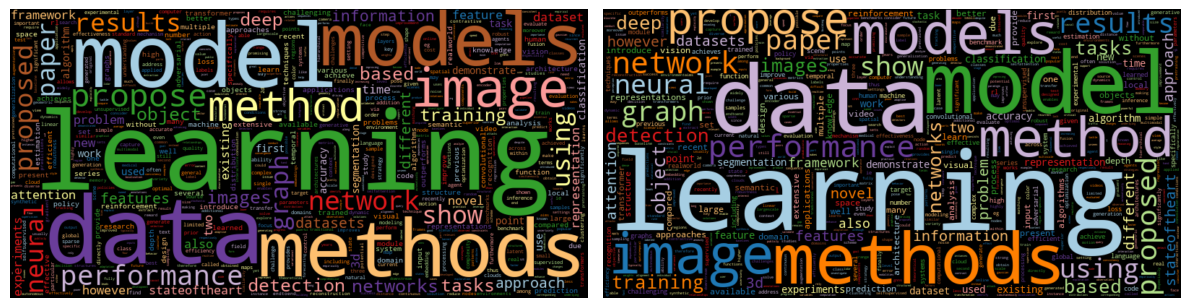

In [44]:
wordcloud_df = count_words(df)
plot_wc(wordcloud_df)